In [104]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [105]:
import pandas as pd

df_rating = pd.read_csv('MovieRatings.txt')

In [106]:
df_rating

,Label,Matrix,Alien,Serenity,Casablanca,Amelie,Lovestory
0,1,5,5,5,0,1,2
1,1,5,5,4,0,0,1
2,1,5,4,5,0,0,0
3,1,3,5,5,1,0,1
4,2,0,2,0,4,4,5
5,2,0,0,0,5,5,4
6,2,0,1,0,5,5,5
7,2,1,1,1,5,4,5
8,3,5,5,3,5,5,4
9,3,5,4,5,5,4,3


In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X, y = df_rating.iloc[:, 1:].values, df_rating.iloc[:, 0].values
X_std = sc.fit_transform(X.astype(numpy.float64))

In [108]:
import numpy as np
covariant_matrix = np.cov(X_std.T)
print(covariant_matrix)

[[ 1.06666667  0.96521186  0.95158901 -0.16899687 -0.08154738 -0.09513726]
 [ 0.96521186  1.06666667  0.94309726 -0.18911713 -0.0479028  -0.002157  ]
 [ 0.95158901  0.94309726  1.06666667 -0.30341678 -0.26305108 -0.1959472 ]
 [-0.16899687 -0.18911713 -0.30341678  1.06666667  0.97030661  0.90913378]
 [-0.08154738 -0.0479028  -0.26305108  0.97030661  1.06666667  0.94688718]
 [-0.09513726 -0.002157   -0.1959472   0.90913378  0.94688718  1.06666667]]


In [109]:
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)
print(eigen_values)
print('\n')
print(eigen_vectors)

[ 3.42231044  2.52950698  0.18898832  0.13888639  0.06941311  0.05089476]


[[ 0.39899925  0.42317036  0.37689989 -0.29450793 -0.65478594 -0.06475619]
 [ 0.38571437  0.441275   -0.38153996 -0.31283853  0.39085676  0.51018732]
 [ 0.44757258  0.34847941  0.08362467  0.64694183  0.29533205 -0.40680836]
 [-0.42992215  0.37170338  0.55025666  0.30426767  0.10671195  0.51986046]
 [-0.40194939  0.42499582  0.10587192 -0.47057695  0.35633206 -0.54606884]
 [-0.38119081  0.43125454 -0.62561121  0.28782272 -0.43920993 -0.03970413]]


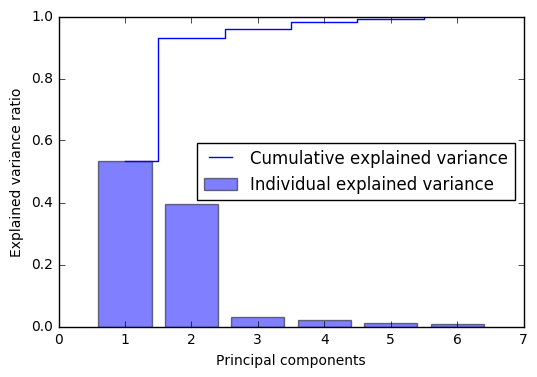

In [119]:
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1, len(eigen_values)+1), var_exp, alpha=0.5, \
    align='center', label='Individual explained variance')
step(range(1, len(eigen_values)+1), cum_var_exp,\
     where='mid', label='Cumulative explained variance')

ylim([0,1])
xlabel('Principal components')
ylabel('Explained variance ratio')
legend(loc='best')
show()

In [111]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(3.4223104409835177,
  array([ 0.39899925,  0.38571437,  0.44757258, -0.42992215, -0.40194939,
         -0.38119081])),
 (2.5295069820935643,
  array([ 0.42317036,  0.441275  ,  0.34847941,  0.37170338,  0.42499582,
          0.43125454])),
 (0.18898832086212394,
  array([ 0.37689989, -0.38153996,  0.08362467,  0.55025666,  0.10587192,
         -0.62561121])),
 (0.13888638993648772,
  array([-0.29450793, -0.31283853,  0.64694183,  0.30426767, -0.47057695,
          0.28782272])),
 (0.06941310561580262,
  array([-0.65478594,  0.39085676,  0.29533205,  0.10671195,  0.35633206,
         -0.43920993])),
 (0.050894760508503452,
  array([-0.06475619,  0.51018732, -0.40680836,  0.51986046, -0.54606884,
         -0.03970413]))]

In [112]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],  eigen_pairs[1][1][:, np.newaxis]))
w.shape

(6, 2)

In [120]:
print(w)

[[ 0.39899925  0.42317036]
 [ 0.38571437  0.441275  ]
 [ 0.44757258  0.34847941]
 [-0.42992215  0.37170338]
 [-0.40194939  0.42499582]
 [-0.38119081  0.43125454]]


In [121]:
print(X_std[0])

[ 1.13389342  1.06458129  1.20849872 -1.30905452 -0.71713717 -0.22604179]


In [122]:
print(X_std[0].dot(w))

[ 2.34114726  0.48189829]


In [116]:
X_pca = X_std.dot(w)

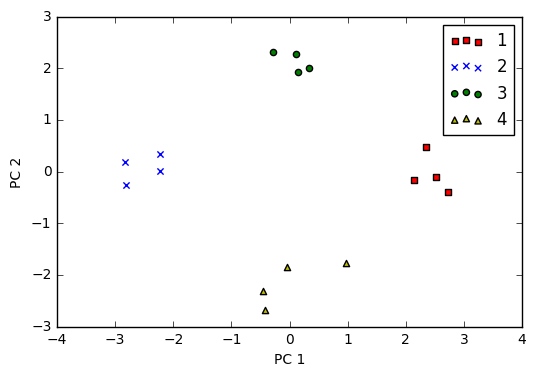

In [117]:
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '^']

for l, c, m in zip(np.unique(y), colors, markers):
    scatter(X_pca[y==l, 0], X_pca[y==l, 1], c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='best')
show()

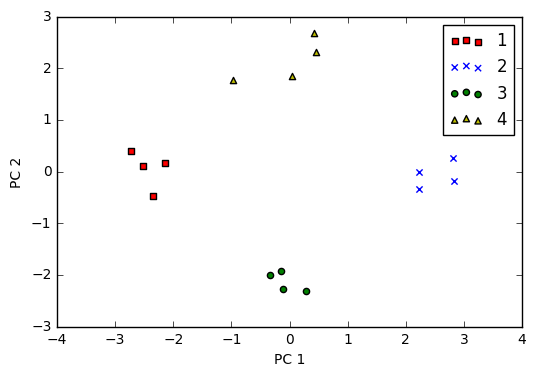

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca_data = pca.fit_transform(X_std)

colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '^']

for l, c, m in zip(np.unique(y), colors, markers):
    scatter(X_pca_data[y==l, 0], X_pca_data[y==l, 1],\
            c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='best')
show()